In [28]:
import json
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
file_path = "heartbit.json"

if os.path.isfile(file_path):
    with open(file_path, "r") as file:
        hearbit_dict = json.load(file)

In [3]:
for k, values in hearbit_dict.items():
    break

In [4]:
datetime_objects = [datetime.fromisoformat(v[1]) for v in values]


In [5]:
# Check for more than 8 minutes difference
is_on = [(datetime_objects[i+1] - datetime_objects[i]).total_seconds() < 480 for i in range(len(datetime_objects)-1)]

In [6]:
times = datetime_objects[1:]

In [24]:
cameras = np.unique([k.split('_')[0] for k in hearbit_dict.keys()])[1:] # remove adf first cam
cameras

array(['brison', 'cabanelle', 'courmettes', 'ferion', 'marguerite',
       'salaunes', 'st', 'test', 'valbonne'], dtype='<U10')

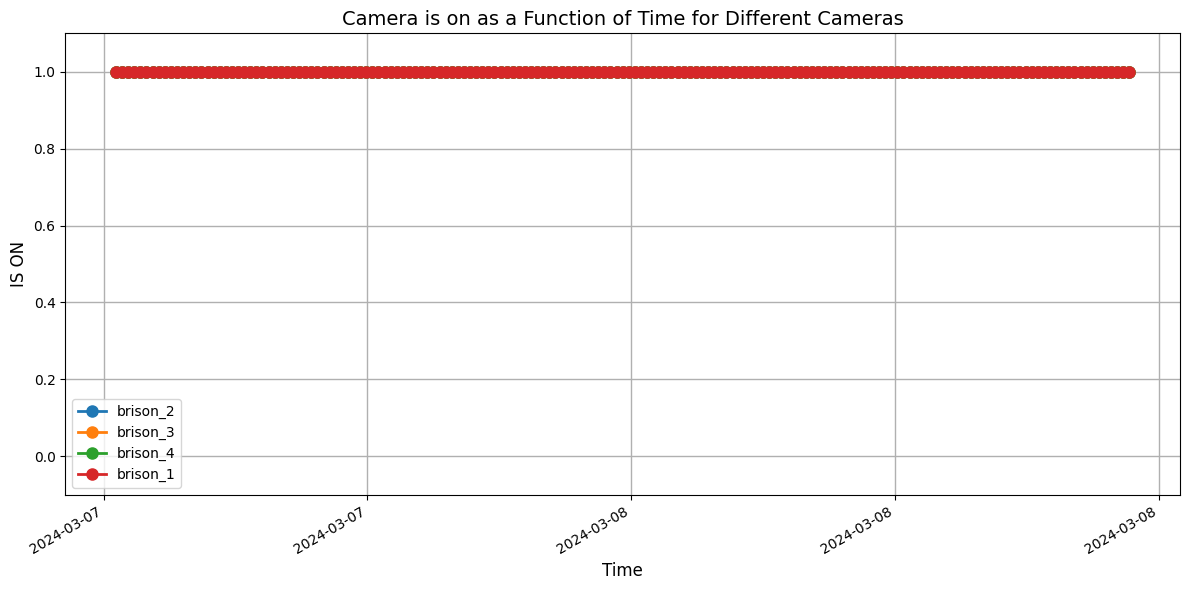

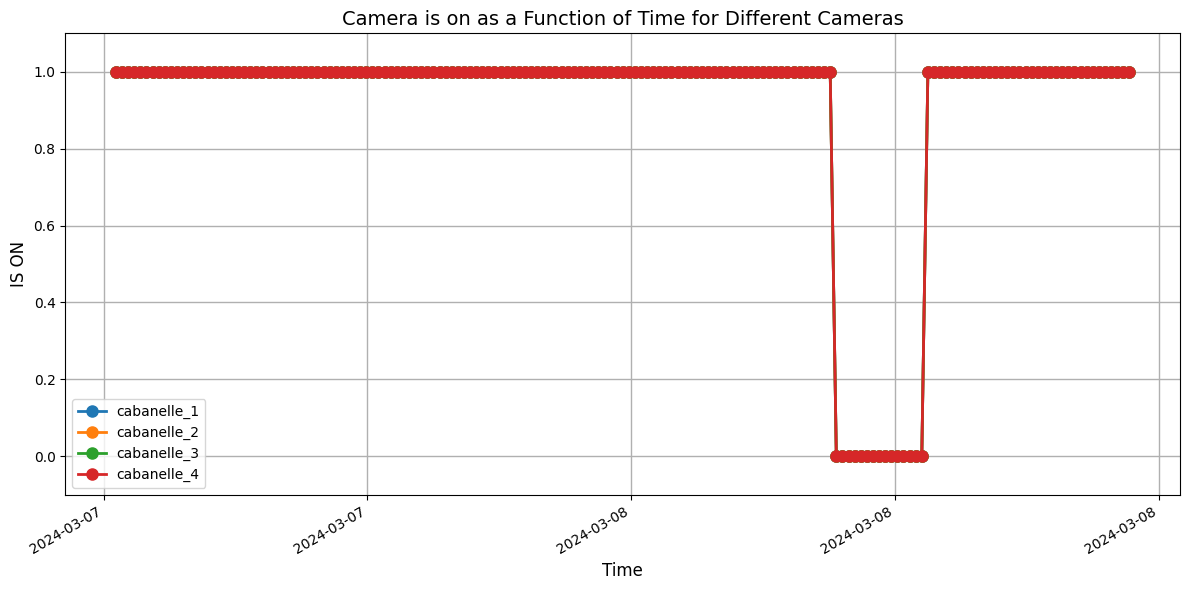

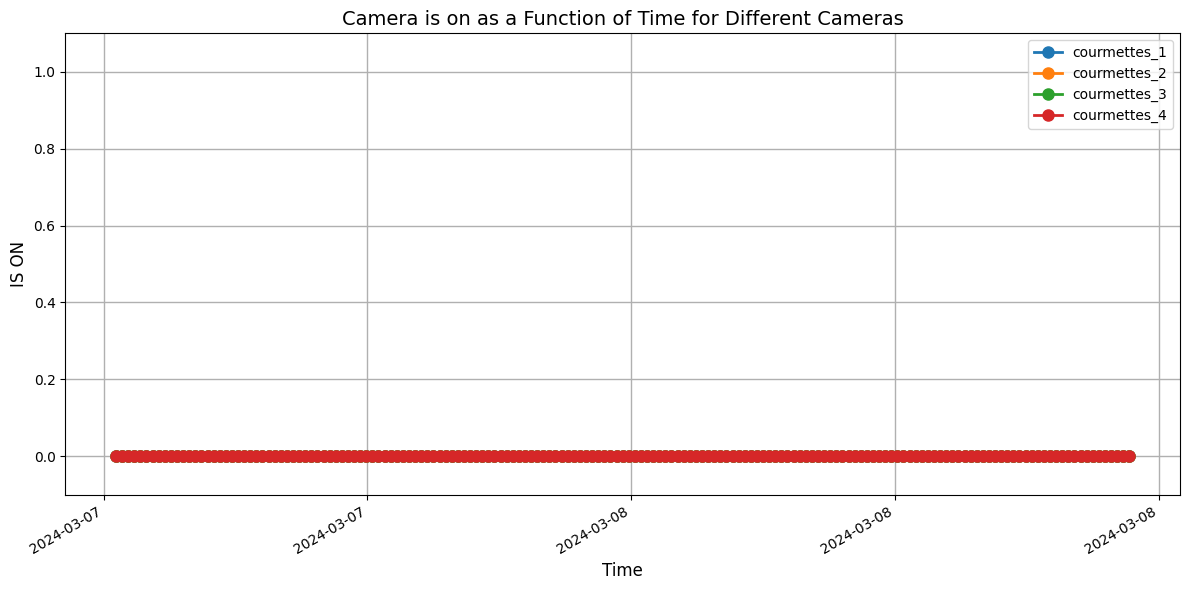

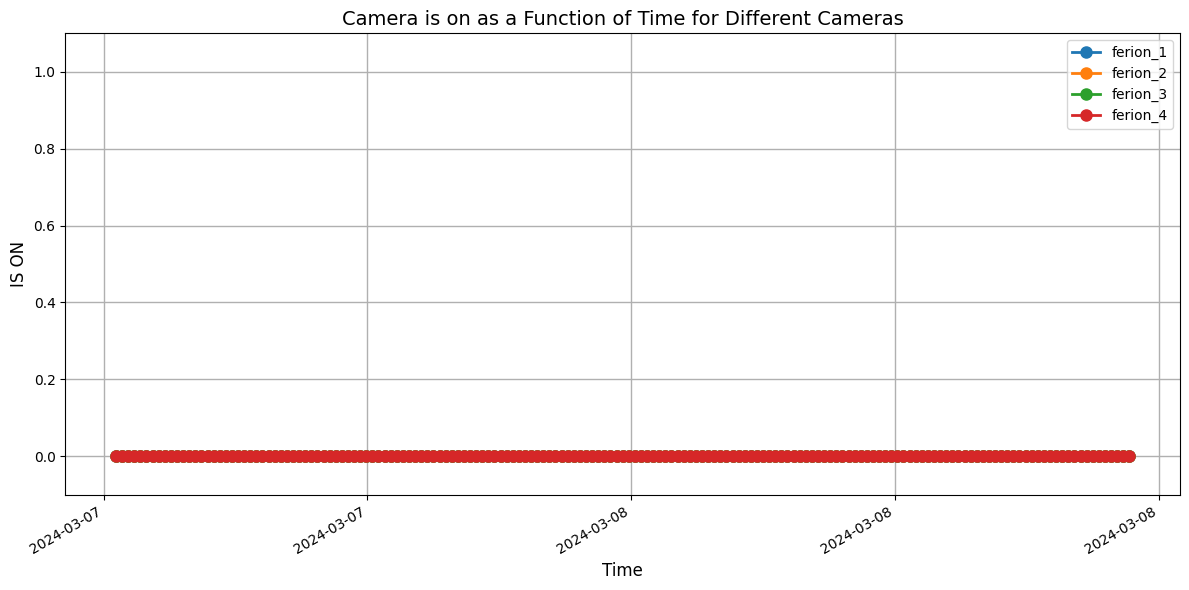

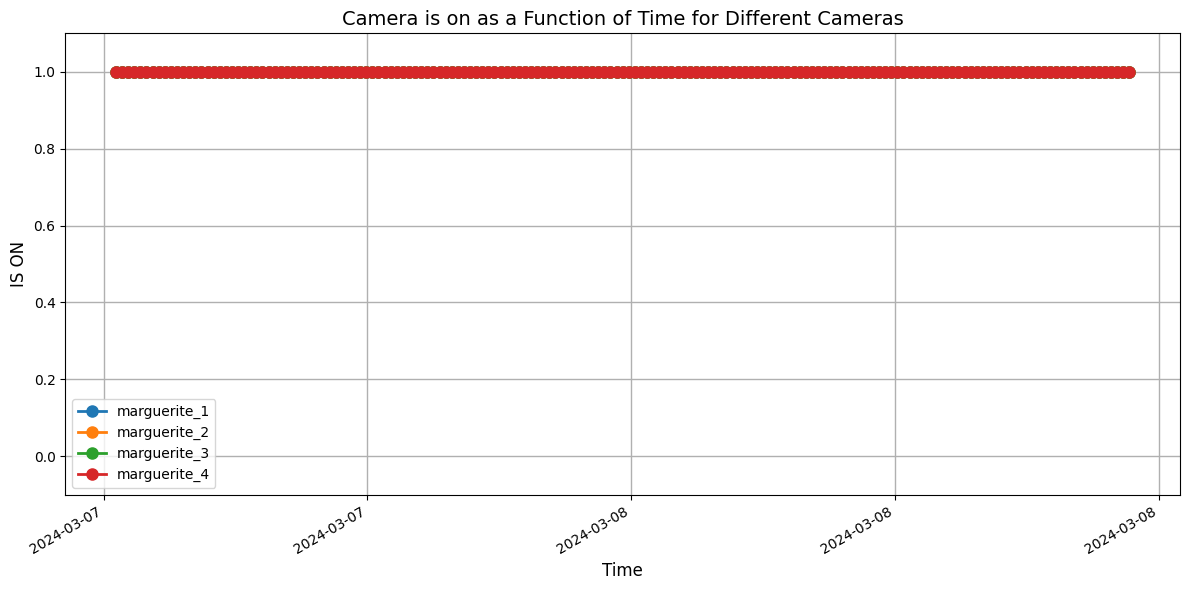

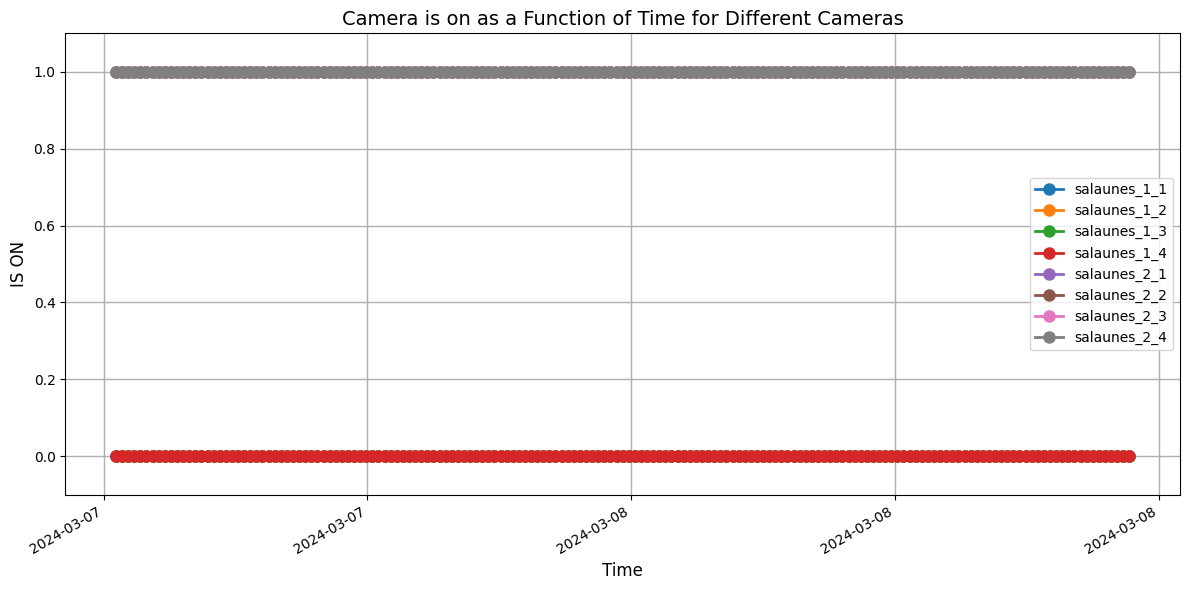

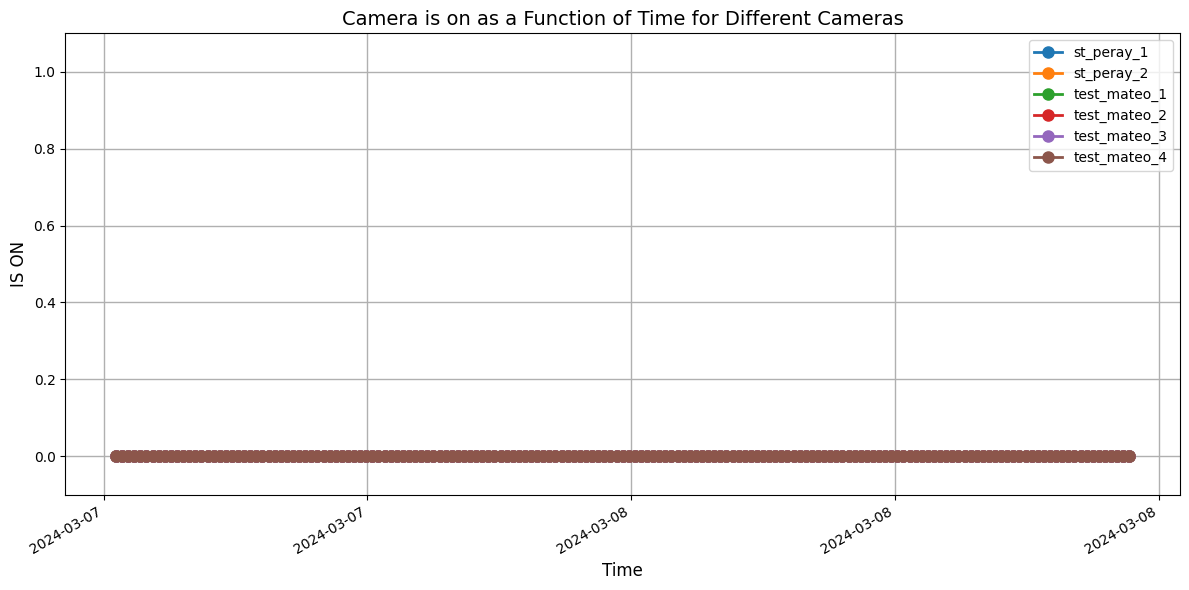

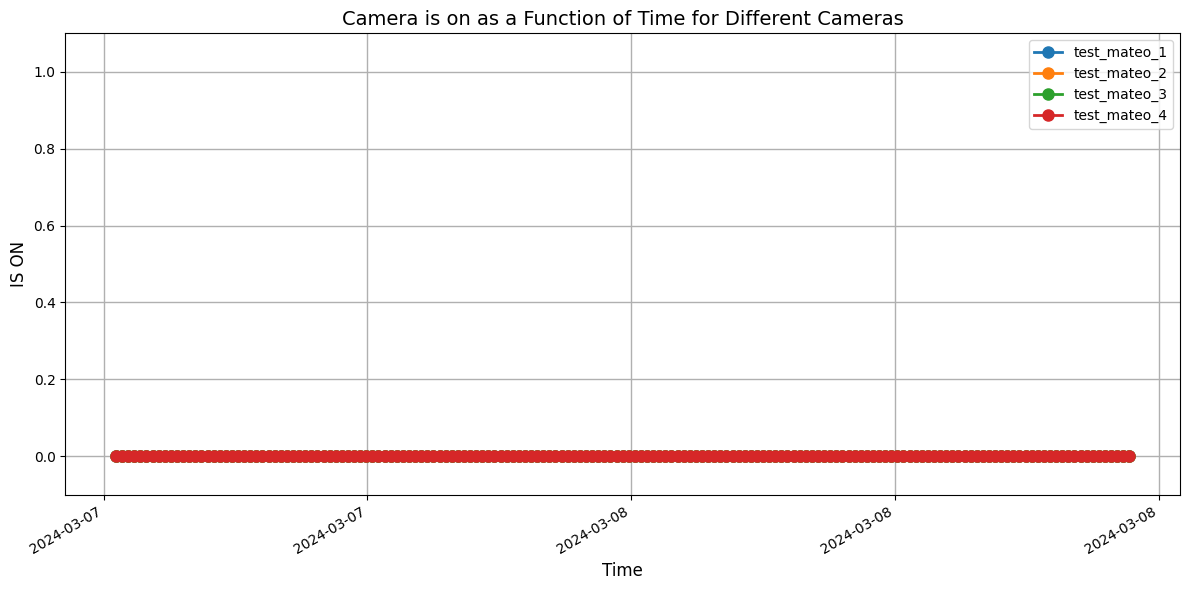

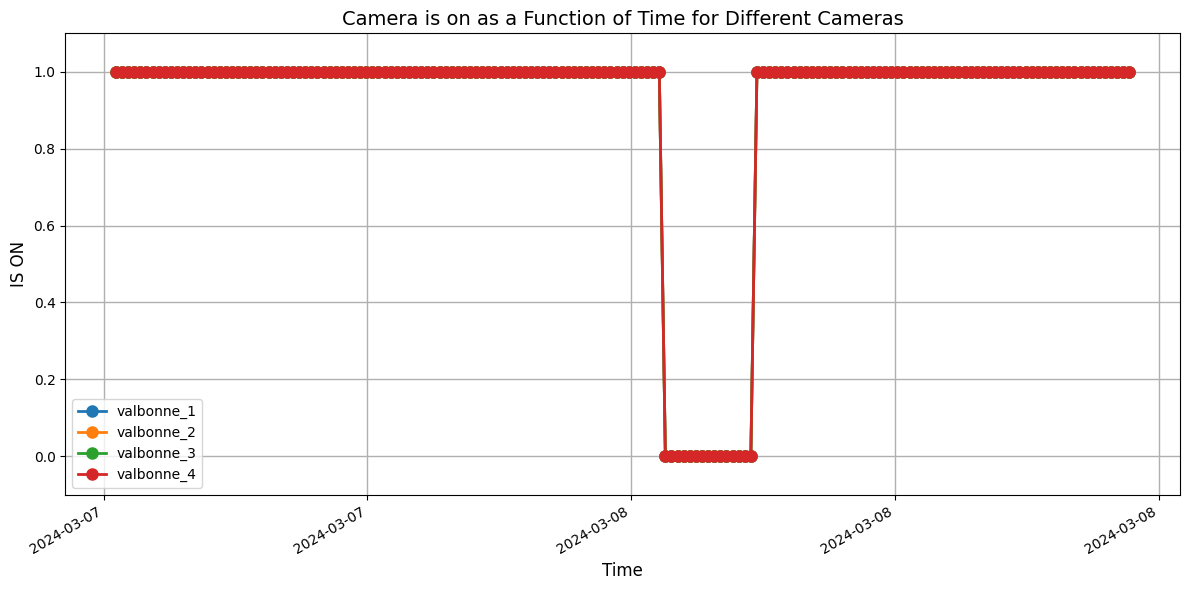

In [29]:
for cam_id in cameras:
    plt.figure(figsize=(12, 6))  # Increase figure width
    for camera, values in hearbit_dict.items():
        if cam_id in camera:
            datetime_objects = [datetime.fromisoformat(v[1]) for v in values]
            is_on = [0 < (datetime_objects[i+1] - datetime_objects[i]).total_seconds() < 480 for i in range(len(datetime_objects)-1)]
            times = [datetime.fromisoformat(v[0]) for v in values[1:]]
            plt.plot(times, is_on, marker='o', linestyle='-', label=camera, linewidth=2, markersize=8)

    # Adjust y-axis to better visualize boolean values
    plt.ylim(-0.1, 1.1)

    # Set the locator
    locator = MaxNLocator(prune='both', nbins=6)  # nbins will set the desired number of ticks
    plt.gca().xaxis.set_major_locator(locator)

    # Set the formatter
    plt.gcf().autofmt_xdate()  # Auto format date

    # Set labels, titles, and legend
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('IS ON', fontsize=12)
    plt.title('Camera is on as a Function of Time for Different Cameras', fontsize=14)

    plt.grid(True, linewidth=1)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()